# Attrition Analysis in Python (Second Part of the project)

In this notebook, we will continue the analysis that we have started in the previous part of this project which was done in R. The previous part of the project can be consulted in the following links:

 - For consulting directly as an HTML webpage: https://stefananca98.github.io/Attrition-Analysis-with-R/
 - For consulting the project repository: https://github.com/StefanAnca98/Attrition-Analysis-with-R

The main objective of this notebook is to improve the analysis that was made previously and not only to do a general analysis of the dataset. In this notebook, we will follow the recommendations provided at the end of the previous project to improve the results obtained. The goal of this project is to **improve the results of the last analysis** getting more refined models, and not only testing them in a general way.

# 1 - EXPLORATORY DATA ANALYSIS

In [1]:
# Importing packages used in this notebook
import pandas as pd

## 1.1 - Loading the data

We will load the data in the same state as the obtained data in the previous project after processing it. This data has some variables with multiple versions (original variables, discretized, standardized...). However, in this project **we are not going to use these versions**, we are loading this version of the dataset because it contains 2 variables obtained from applying different conditions to other variables ("LowSatisfaction" and "HighSatisfaction" variables). So, in this first stage, we will delete all the versions of the variables that are not the original variables or the mentioned variables obtained from applying conditions.

In [2]:
# The same name that was used in the previous project will be used for this project
HR_data = pd.read_csv('data/WorkingAttritionProcessed.csv')

In [3]:
print(HR_data.shape)

(1470, 62)


In [4]:
# We set the maximum possible columns to be displayed to 62 (the number of columns of the dataset)
pd.set_option('display.max_columns', 62);
# We show the first rows of all the variables
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,High_satisfaction,Low_satisfaction,MonthlyIncome_scaled,NumCompaniesWorked_scaled,TotalWorkingYears_scaled,TrainingTimesLastYear_scaled,YearsAtCompany_scaled,YearsInCurrentRole_scaled,YearsSinceLastPromotion_scaled,YearsWithCurrManager_scaled,Age_scaled,DailyRate_scaled,DistanceFromHome_scaled,HourlyRate_scaled,MonthlyRate_scaled,PercentSalaryHike_scaled,MonthlyIncome_discret,NumCompaniesWorked_discret,TotalWorkingYears_discret,TrainingTimesLastYear_discret,YearsAtCompany_discret,YearsInCurrentRole_discret,YearsSinceLastPromotion_discret,YearsWithCurrManager_discret,Age_discret,DailyRate_discret,DistanceFromHome_discret,HourlyRate_discret,MonthlyRate_discret,PercentSalaryHike_discret
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,0,8,0,1,6,4,0,5,0,0,0.416310,0.942809,0.447214,0.000000,0.387298,0.471405,0.000000,0.542326,0.547619,0.715820,0.000000,0.914286,0.698053,0.000000,"[0.272,0.484)","[0.666,1]","[0.441,0.629)","[0,0.312)","[0.284,0.448)","[0.181,0.501)","[0,0.153)","[0.424,0.687)","[0.448,0.681)","[0.483,0.739)","[0,0.161)","[0.756,1]","[0.497,0.745)","[0,0.117)"
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,1,10,3,3,10,7,1,7,0,0,0.363503,0.333333,0.500000,0.707107,0.500000,0.623610,0.258199,0.641689,0.738095,0.126700,0.250000,0.442857,0.916001,0.857143,"[0.272,0.484)","[0.167,0.43)","[0.441,0.629)","[0.312,0.72)","[0.448,0.633)","[0.501,0.748)","[0.153,0.46)","[0.424,0.687)","[0.681,1]","[0,0.236)","[0.161,0.43)","[0.261,0.509)","[0.745,1]","[0.62,1]"
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,0,7,3,3,0,0,0,0,0,0,0.127235,0.816497,0.418330,0.707107,0.000000,0.000000,0.000000,0.000000,0.452381,0.909807,0.035714,0.885714,0.012126,0.285714,"[0,0.272)","[0.666,1]","[0.281,0.441)","[0.312,0.72)","[0,0.284)","[0,0.181)","[0,0.153)","[0,0.424)","[0.448,0.681)","[0.739,1]","[0,0.161)","[0.756,1]","[0,0.247)","[0.117,0.332)"
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,0,8,3,3,8,7,3,0,0,0,0.202187,0.333333,0.447214,0.707107,0.447214,0.623610,0.447214,0.000000,0.357143,0.923407,0.071429,0.371429,0.845814,0.000000,"[0,0.272)","[0.167,0.43)","[0.441,0.629)","[0.312,0.72)","[0.284,0.448)","[0.501,0.748)","[0.153,0.46)","[0,0.424)","[0.255,0.448)","[0.739,1]","[0,0.161)","[0.261,0.509)","[0.745,1]","[0,0.117)"
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,1,6,3,3,2,2,2,2,0,0,0.247371,1.000000,0.387298,0.707107,0.223607,0.333333,0.365148,0.342997,0.214286,0.350036,0.035714,0.142857,0.583738,0.071429,"[0,0.272)","[0.666,1]","[0.281,0.441)","[0.312,0.72)","[0,0.284)","[0.181,0.501)","[0.153,0.46)","[0,0.424)","[0,0.255)","[0.236,0.483)","[0,0.161)","[0,0.261)","[0.497,0.745)","[0,0.117)"


In [5]:
# We will also take a look at the names of the columns
HR_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'High_satisfaction', 'Low_satisfaction', 'MonthlyIncome_scaled',
       'NumCompaniesWorked_scaled', 'TotalWorkingYears_scaled',
       'TrainingTimesLastYear_scaled', 'YearsAtCompany_scaled',
       'YearsInCurrentRole_scaled', 'YearsSinceLastPromotion_scaled',
       'YearsWithCurrManager_scaled', 'Age_scaled', 'DailyRate_scaled',
       'DistanceFromHome_scal

In [6]:
# Now, we will select only the original variables and "Low_satisfaction" and "High_satisfaction
# We get the index of the first satisfaction variable (all the rest transformed variables are the following variables until the end of the dataset)
start_index = HR_data.columns.get_loc("MonthlyIncome_scaled")
# We exclude all the variables from this index
HR_data = HR_data.loc[:, HR_data.columns[:start_index]]
HR_data.shape

(1470, 34)

In [7]:
print(HR_data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'High_satisfaction', 'Low_satisfaction'],
      dtype='object')


We can see, how the last variable now is "Low_satisfaction", and we can compare this otput with the "colnmaes" output before excluding the variables. In the current case, only the original variables and "High_satisfaction" and "Low_satisfaction" are still in the dataset.

## 1.2 - Dataset fragmentation

In this section, we will create independent datasets for each type of variable that we have in the original dataset. We will create different datasets for the following cases:

**Target variable:** The "Attrition" variable will be in an independent dataset, called "Y".

**Original satisfaction variables:** All the variables related to "satisfaction" that were part of the original dataset ("Low_satisfaction" and "High_satisfaction" will not be included in this dataset).

**Satisfaction variables obtained from applying conditions to original variables:** These variables are "Low_Satisfaction" and "High_Satisfaction").

**Categorical variables:** All the categorical variables will be stored in a different dataset.

**Numeric continuous variables:** All the continuous numeric variables will be stored in another dataset.

The reason of this fragmentation is a conceptual separation of the data. In first place, the target variable is the variable to predict, as we will train mutiple models using **scikit-learn** we need to have this variable in a separated dataset. On the other hand, both versions of the satisfaction variables, as there are not independent, aren't going to be used simulteneously in a training process, we will have to choose one of these (the original satisfaction variables, or those obtained from applying conditions to the original variables). In relation to the categorical variables and the numerical continuous variables, as their caracteristics are diffrent and may require diffrent analysis and manipulations (in the case that are conducted), is easier to handle them if there are in separated dataframes.

This will allow us to create the training and test datasets with the required variations in the preprocessing, ad hoc, depending on the context and the trained model. We will be able to previously do the required manipulations to any of the dataset, and after append all that are going to be used for training a model in a single dataset.

In [8]:
Y = HR_data['Attrition'].to_frame()
Y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [9]:
original_satisfaction = HR_data[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']]
original_satisfaction

,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction
0,4,2,1
1,2,3,4
2,3,4,2
3,3,4,3
4,2,1,4
...,...,...,...
1465,4,3,3
1466,1,4,1
1467,2,2,2
1468,2,4,4


In [10]:
obtained_satisfaction = HR_data[['High_satisfaction', 'Low_satisfaction']]
obtained_satisfaction

,High_satisfaction,Low_satisfaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1465,0,0
1466,0,1
1467,0,0
1468,1,0


In [11]:
numeric_variables = HR_data[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate', 'PercentSalaryHike']]
numeric_variables

,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike
0,5993,8,8,0,6,4,0,5,41,1102,1,94,19479,11
1,5130,1,10,3,10,7,1,7,49,279,8,61,24907,23
2,2090,6,7,3,0,0,0,0,37,1373,2,92,2396,15
3,2909,1,8,3,8,7,3,0,33,1392,3,56,23159,11
4,3468,9,6,3,2,2,2,2,27,591,2,40,16632,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,4,17,3,5,2,0,3,36,884,23,41,12290,17
1466,9991,4,9,5,7,7,1,7,39,613,6,42,21457,15
1467,6142,1,6,0,6,2,0,3,27,155,4,87,5174,20
1468,5390,2,17,3,9,6,0,8,49,1023,2,63,13243,14


In the previous selections of dataset we have selected all the variables that are not categorical. If we select all the variables that are not inclueded in any of the previous created datasets in this section, we will have all the categorical variables (that are not the target or variables relaeted with satisfaction).

In [12]:
# We create a list with the names of all the variables that we selected (We also include "Over18" as all their values are the same)
selected_variables = list(original_satisfaction.columns) + list(obtained_satisfaction.columns) + list(Y) + list(numeric_variables.columns) + list(["Over18"])
# Now we create a dataset where these variables are excluded
categorical_variables = HR_data.drop(columns=selected_variables)
categorical_variables

,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,OverTime,PerformanceRating,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Sales,2,Life Sciences,Female,3,2,Sales Executive,Single,1,3,0,1
1,Travel_Frequently,Research & Development,1,Life Sciences,Male,2,2,Research Scientist,Married,0,4,1,3
2,Travel_Rarely,Research & Development,2,Other,Male,2,1,Laboratory Technician,Single,1,3,0,3
3,Travel_Frequently,Research & Development,4,Life Sciences,Female,3,1,Research Scientist,Married,1,3,0,3
4,Travel_Rarely,Research & Development,1,Medical,Male,3,1,Laboratory Technician,Married,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,2,Medical,Male,4,2,Laboratory Technician,Married,0,3,1,3
1466,Travel_Rarely,Research & Development,1,Medical,Male,2,3,Healthcare Representative,Married,0,3,1,3
1467,Travel_Rarely,Research & Development,3,Life Sciences,Male,4,2,Manufacturing Director,Married,1,4,1,3
1468,Travel_Frequently,Sales,3,Medical,Male,2,2,Sales Executive,Married,0,3,0,2


## 1.3 - Description of the data

As is pointed out in the conclusions of the previous project, the **Exploratory Data Analysis** (EDA) that was made, was very generic. In this project, the EDA will focus more on our goal, predicting and understanding how job abandonment occurs.

Nevertheless, first, we will make a general summary of the data.

### 1.3.1 - General Overview of the Data

<div class="alert alert-block alert-success">
<strong>TARGET VARIABLE</strong>

</div>

<Axes: xlabel='Attrition'>

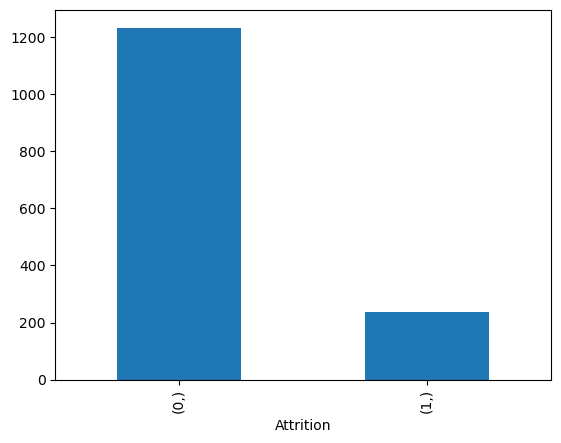

In [13]:
# We import some visualisation datasets
import matplotlib
import matplotlib.pyplot as plt

# We create a barplot of the target value
Y.value_counts().plot(kind='bar')

As we already know from the previous project, the classes of this variable are unbalanced, this is something that we will handle before training any model.

<div class="alert alert-block alert-success">
<strong>SATISFACTION VARIABLES</strong>

</div>

For the original satisfaction variables we will create **histograms**.

In [14]:
original_satisfaction.columns

Index(['JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction'],
      dtype='object')

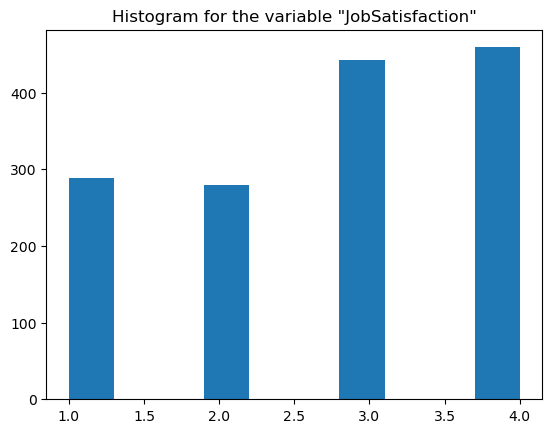

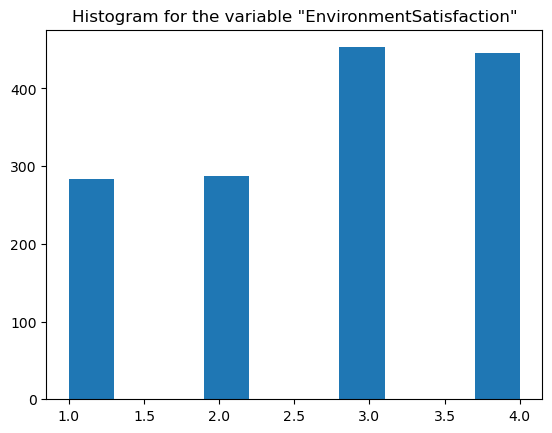

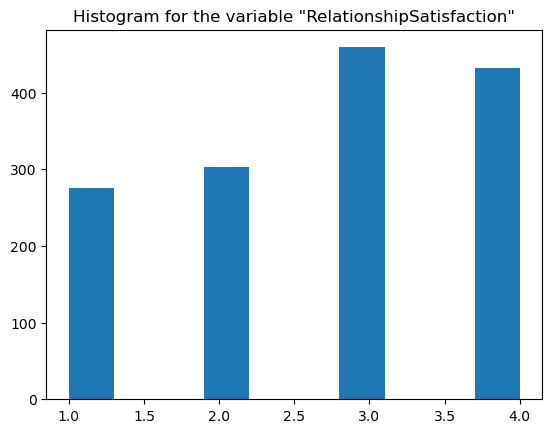

In [15]:
# We create the histograms

# JobSatisfaction Histogram
plt.hist(original_satisfaction['JobSatisfaction'])
plt.title('Histogram for the variable "JobSatisfaction"')
plt.show()

# EnvironmentSatisfaction Histogram
plt.hist(original_satisfaction['EnvironmentSatisfaction'])
plt.title('Histogram for the variable "EnvironmentSatisfaction"')
plt.show()

# RelationshipSatisfaction Histogram
plt.hist(original_satisfaction['RelationshipSatisfaction'])
plt.title('Histogram for the variable "RelationshipSatisfaction"')
plt.show()

And now, we will use **pie plots** for the satisfaction variables obtained applying conditions to the original satisfaction variables.

In [16]:
obtained_satisfaction.columns

Index(['High_satisfaction', 'Low_satisfaction'], dtype='object')

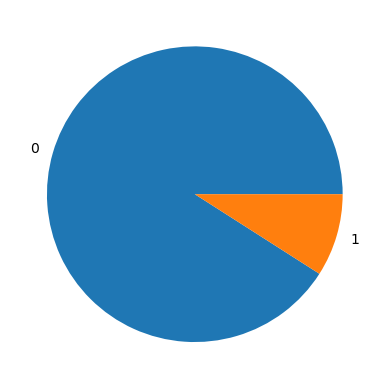

In [17]:
# We count the frequency of each value of "Low_satisfaction" variable
value_counts = obtained_satisfaction['Low_satisfaction'].value_counts()

# Now we create the pie plot
plt.pie(value_counts, labels=value_counts.index)
plt.show()

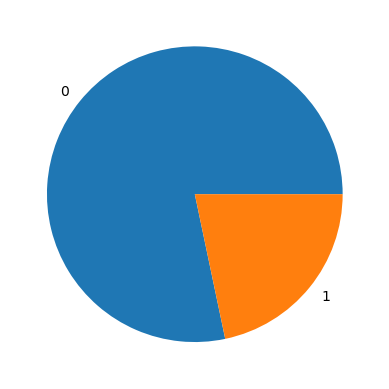

In [18]:
# We count the frequency of each value of "Low_satisfaction" variable
value_counts = obtained_satisfaction['High_satisfaction'].value_counts()

# Now we create the pie plot
plt.pie(value_counts, labels=value_counts.index)
plt.show()

<div class="alert alert-block alert-success">
<strong>CATEGORICAL VARIABLES</strong>

</div>

We will also create **histograms** for these variables.

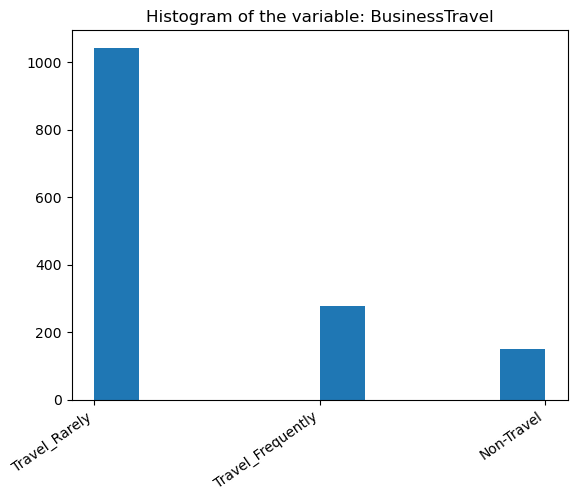

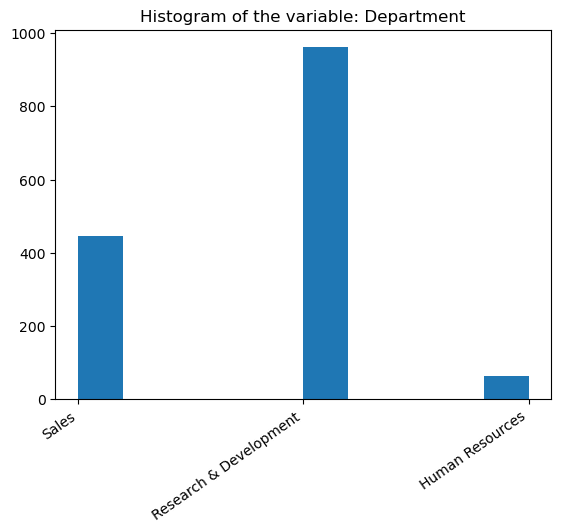

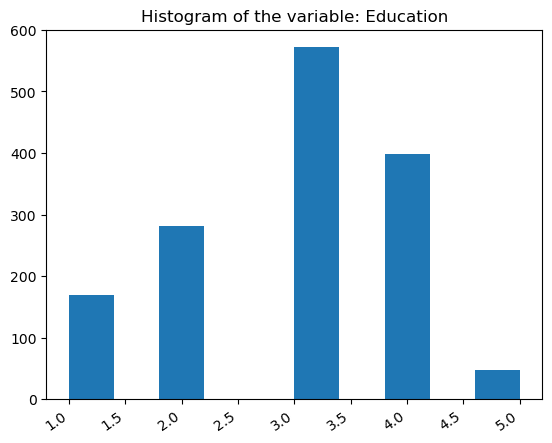

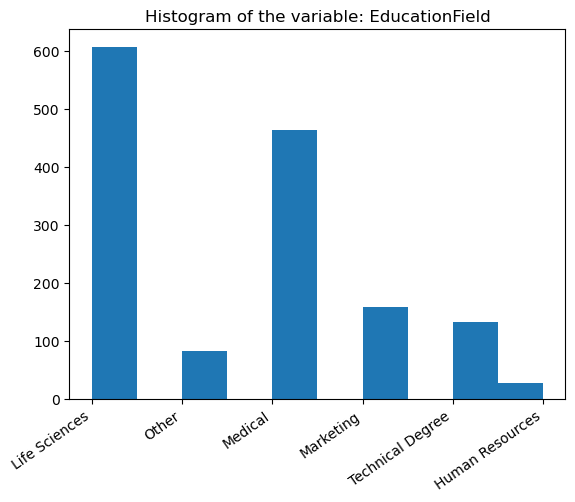

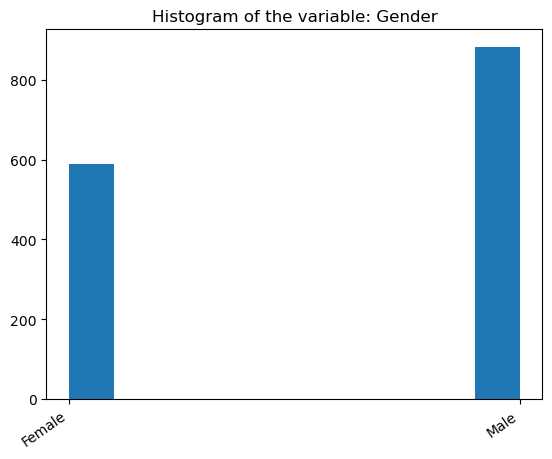

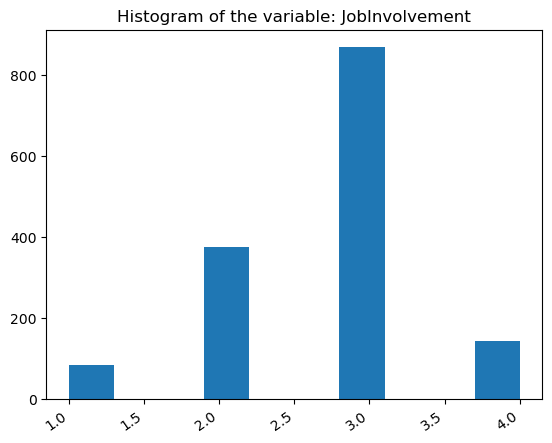

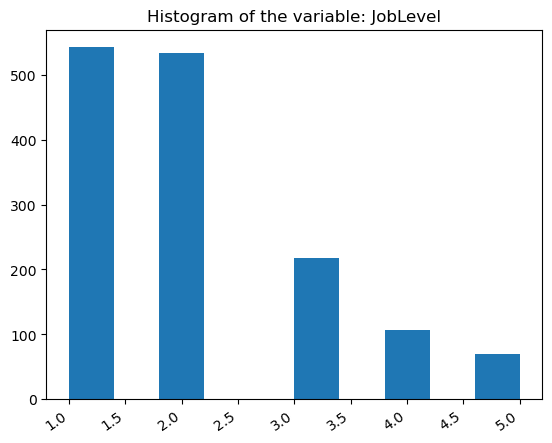

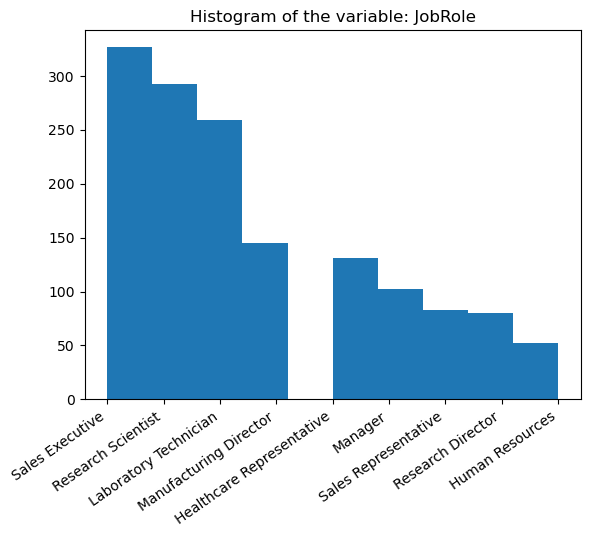

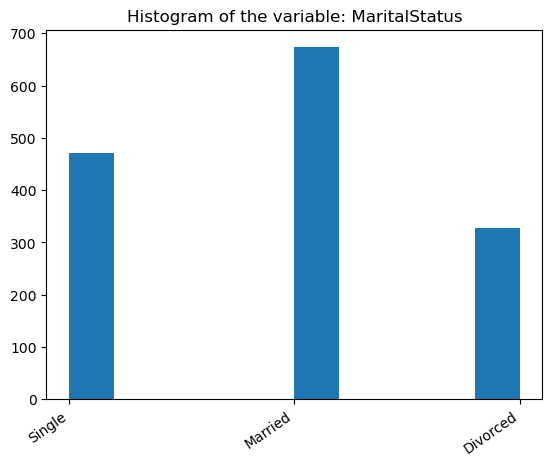

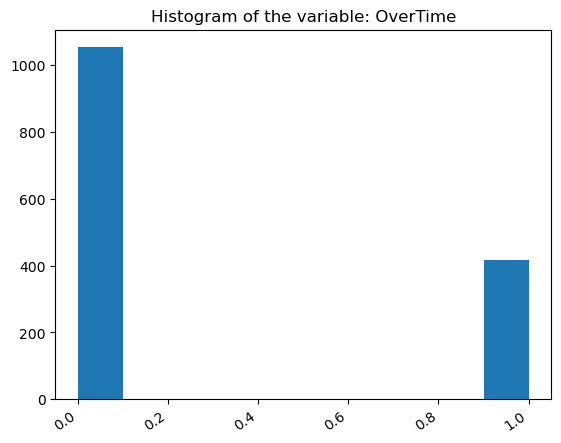

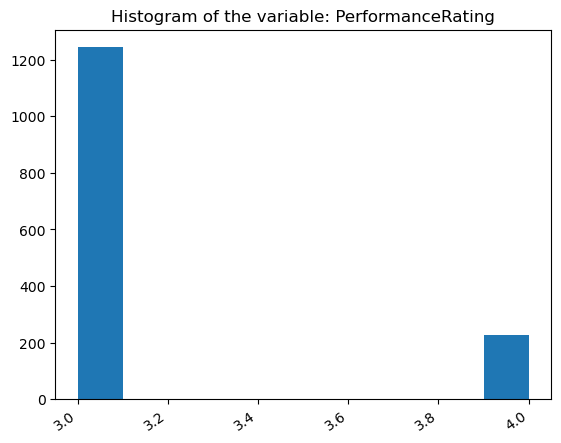

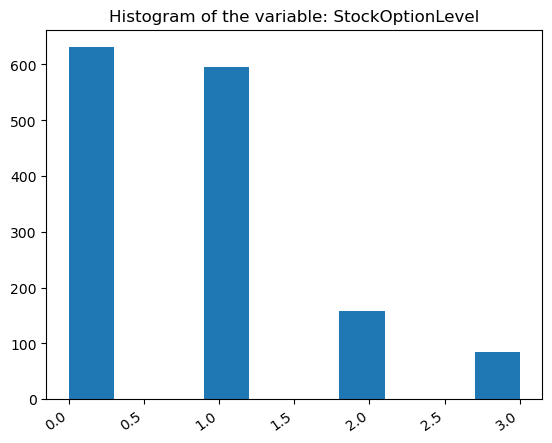

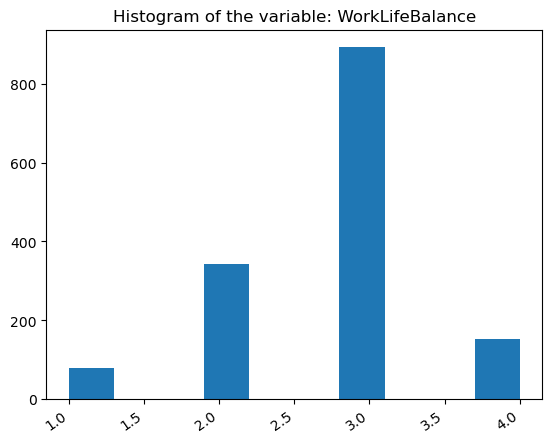

In [19]:
for variable in categorical_variables.columns:
    plt.hist(categorical_variables[variable])
    plt.title("Histogram of the variable: " + variable)
    plt.xticks(rotation = 35, ha='right')
    plt.show()

<div class="alert alert-block alert-success">
<strong>NUMERIC CONTINUOUS VARIABLES</strong>

</div>

In [20]:
numeric_variables.describe()

,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,2.693197,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129,36.923810,802.485714,9.192517,65.891156,14313.103401,15.209524
std,4707.956783,2.498009,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136,9.135373,403.509100,8.106864,20.329428,7117.786044,3.659938
min,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,30.000000,2094.000000,11.000000
25%,2911.000000,1.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,30.000000,465.000000,2.000000,48.000000,8047.000000,12.000000
50%,4919.000000,2.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,36.000000,802.000000,7.000000,66.000000,14235.500000,14.000000
75%,8379.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,43.000000,1157.000000,14.000000,83.750000,20461.500000,18.000000
max,19999.000000,9.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000,60.000000,1499.000000,29.000000,100.000000,26999.000000,25.000000


### 1.3.2 - Exploratory Data Analysis focusing on the target variable

In the previous project, we made an importance analysis of the variables related to the target variable, the importance of each attribute was:
    
 **DailyRate** 0.000000e+00
 
 **DistanceFromHome** 0.000000e+00
 
 **HourlyRate** 0.000000e+00
 
 **MonthlyRate** 0.000000e+00
 
 **NumCompaniesWorked** 0.000000e+00
 
 **PercentSalaryHike** 0.000000e+00
 
 **TrainingTimesLastYear** 0.000000e+00
 
 **YearsSinceLastPromotion** 0.000000e+00
 
 **PerformanceRating** 4.158349e-06
 
 **Gender** 4.372823e-04
 
 **Education** 1.088435e-03
 
 **High_satisfaction** 1.641157e-03
 
 **Department** 3.568144e-03
 
 **WorkLifeBalance** 4.786845e-03
 
 **EducationField** 5.068077e-03
 
 **Low_satisfaction** 6.118896e-03
 
 **BusinessTravel** 8.081713e-03
 
 **JobInvolvement** 8.732048e-03
 
 **YearsInCurrentRole** 1.307347e-02
 
 **MaritalStatus** 1.496588e-02
 
 **Age** 1.646181e-02
 
 **YearsWithCurrManager** 1.826648e-02
 
 **YearsAtCompany** 1.885243e-02
 
 **TotalWorkingYears** 2.019828e-02
 
 **MonthlyIncome** 2.076296e-02
 
 **StockOptionLevel** 2.098402e-02
 
 **JobLevel** 2.179277e-02
 
 **OverTime** 2.768761e-02
 
 **JobRole** 3.024106e-02

We want to verify if the importance of the variables is reflected visually on the variables. For this verification, we will make histograms where the observations of each class will be differentiated. We will use a function that will create the histograms.

In [21]:
# We will create each histogram using a function
def create_histogram(df, target, feature, activate_axvline=False):
    '''
    This function takes as input a dataframe, the name of the target variable of the dataset, and
    the feature to be graphically represented. The function starts by creating a figure and iterates
    over the unique values of the target variable, so that in each iteration, it filters into an
    individual data frame only the observations of the class with the iterated name and adds the
    corresponding histogram of that variable to the figure. 
    '''
    # Create the figure and a list that will contain the names for the legend
    fig, ax = plt.subplots()
    legend = []
    
    # Iterate over each unique class name
    for class_name in df[target].unique():
        # Add the iterated class name to the list containing the legend names
        legend.append(class_name)
        # Filter the dataframe to get another one with only the observations of the iterated class
        filtered_df = df[df[target] == class_name]
        # Set a color that will be used in this iteration, the color will be the current color of "prop_cycler" in matplotlib
        color = next(ax._get_lines.prop_cycler)['color']
        # Create the histogram
        plt.hist(filtered_df[feature], alpha=0.6, color=color)
        plt.xticks(rotation = 35, ha='right')
        # If the default parameter value "activate_axvline" is changed when calling the function
        # an additional line of code is executed
        if activate_axvline == True:
            # This line creates the vertical line with the value of the mean as required in the next exercise
            plt.axvline(sum(filtered_df[feature]) / filtered_df[feature].size, color=color)
        
    # Add a title and the legend
    plt.title(feature)
    plt.legend(legend)
    plt.show()


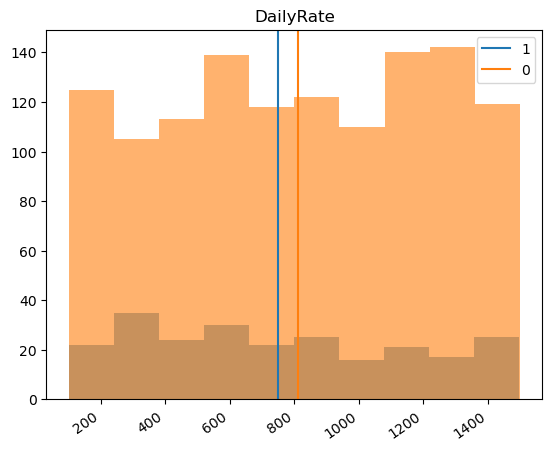

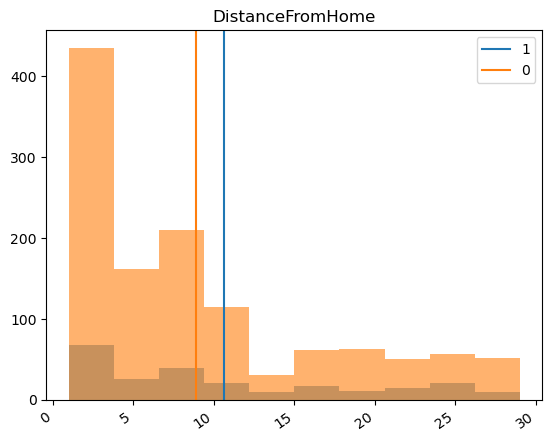

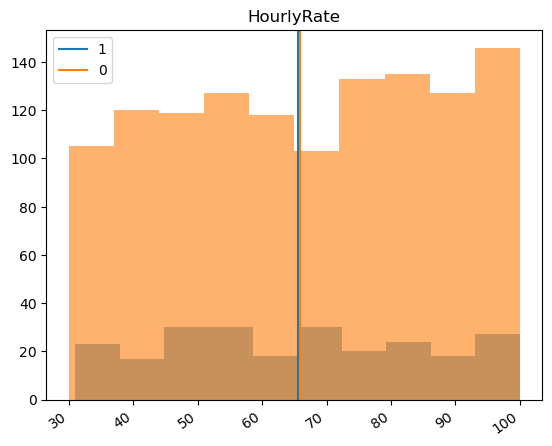

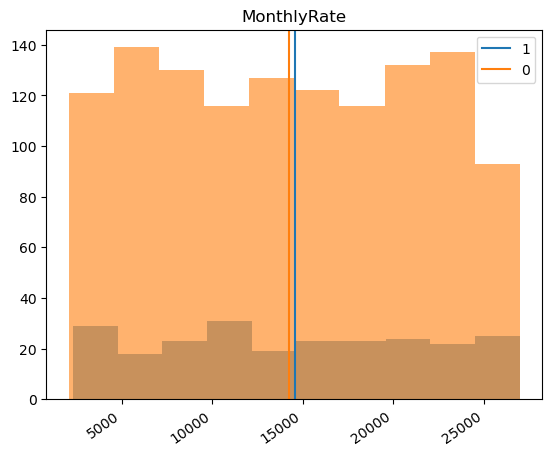

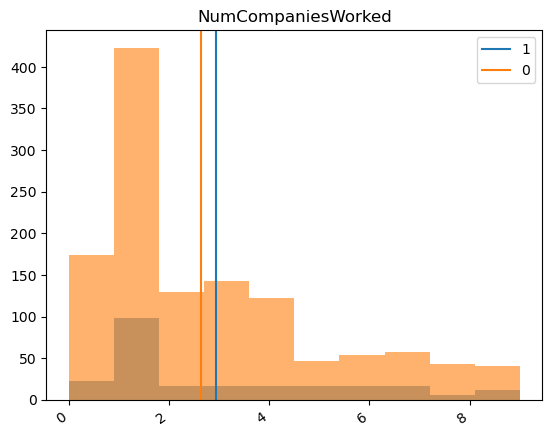

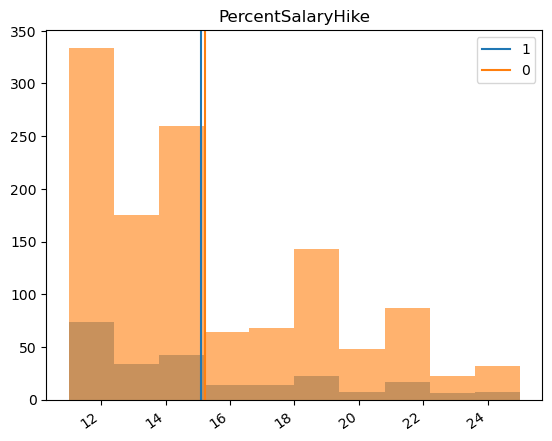

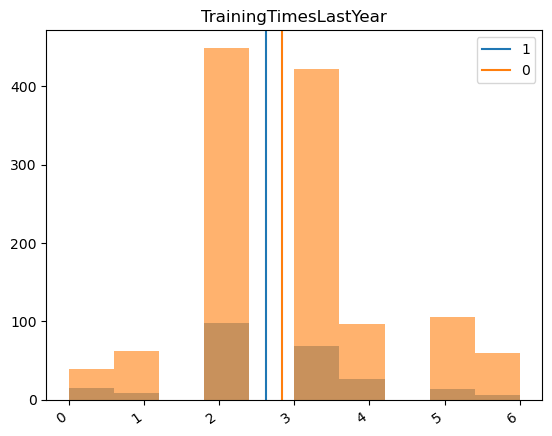

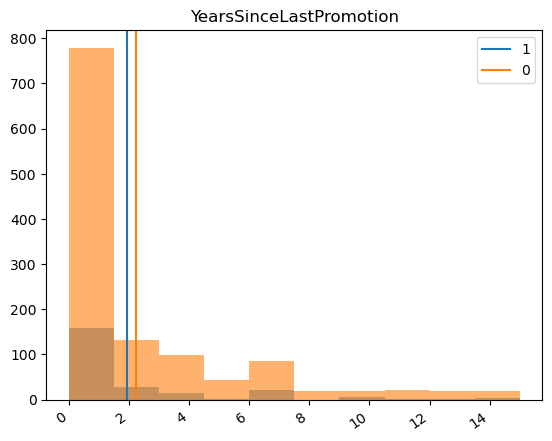

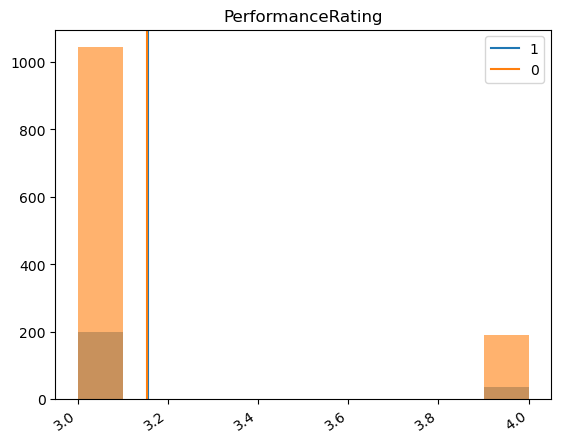

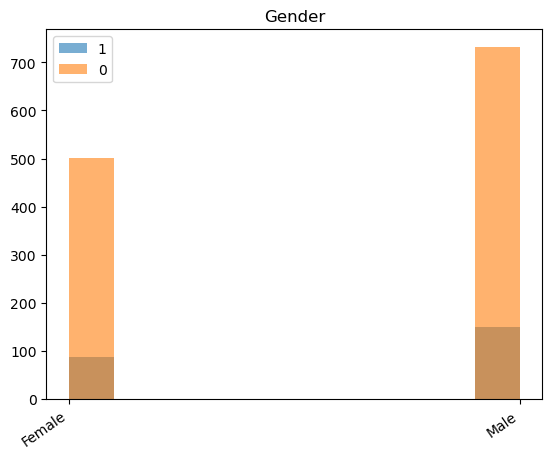

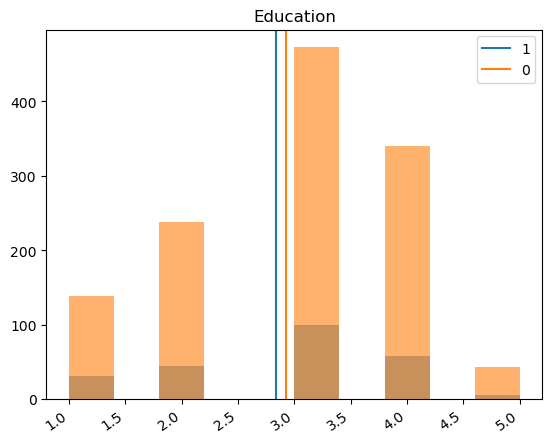

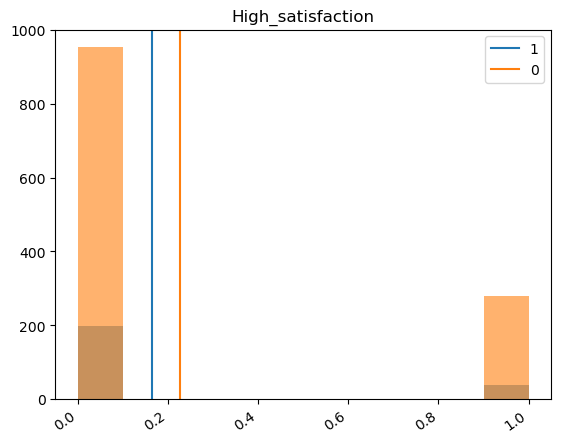

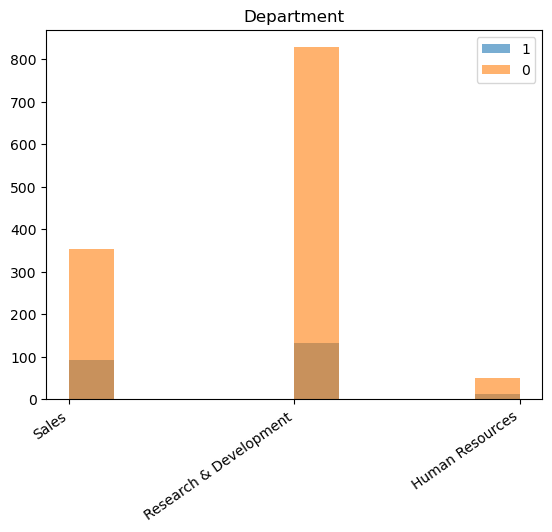

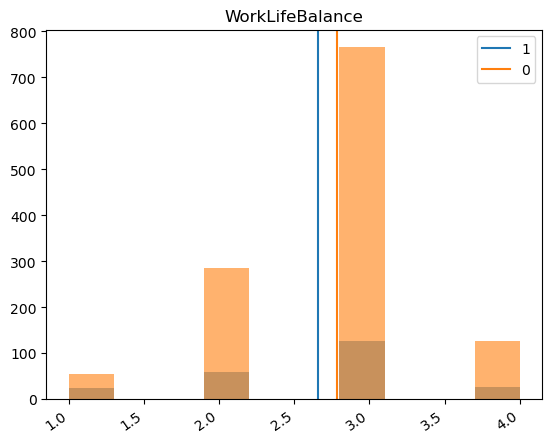

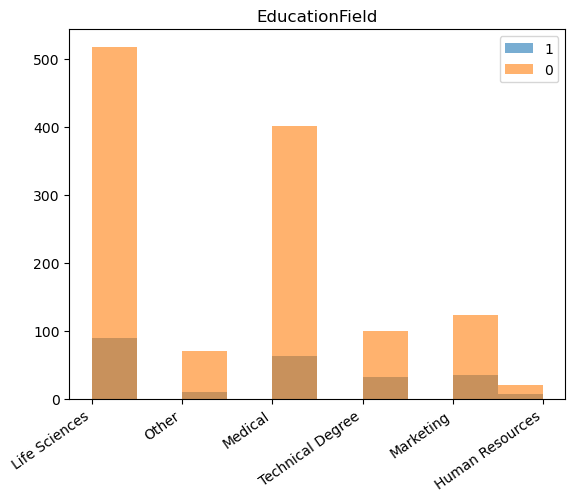

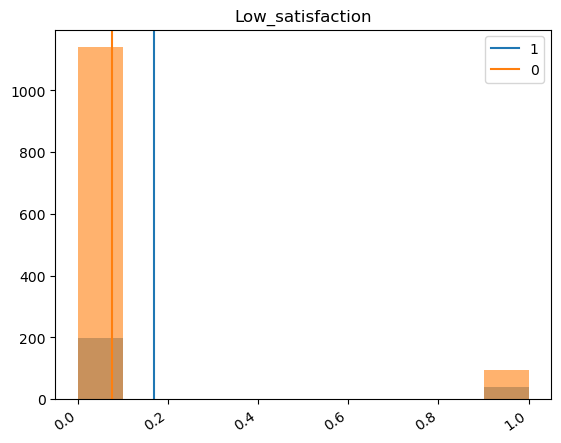

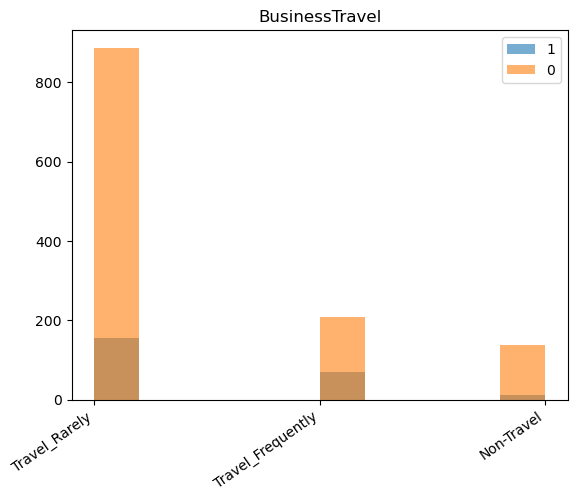

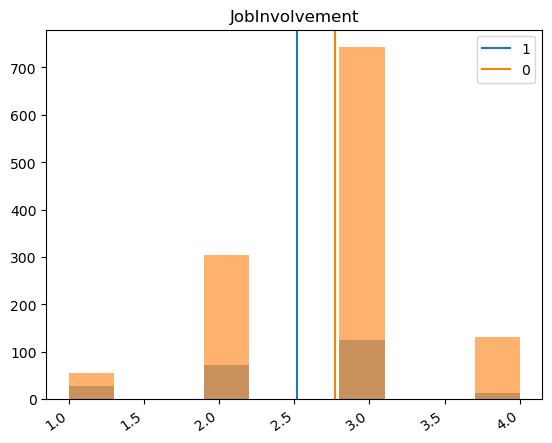

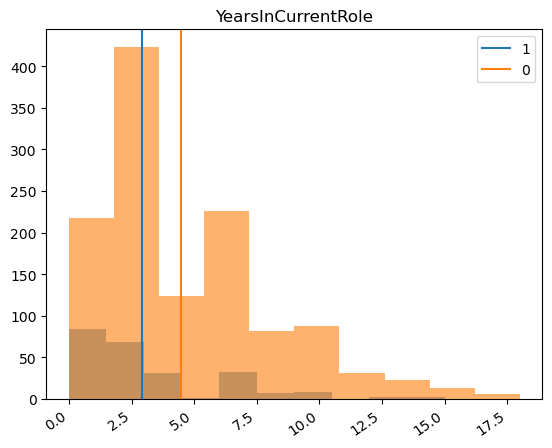

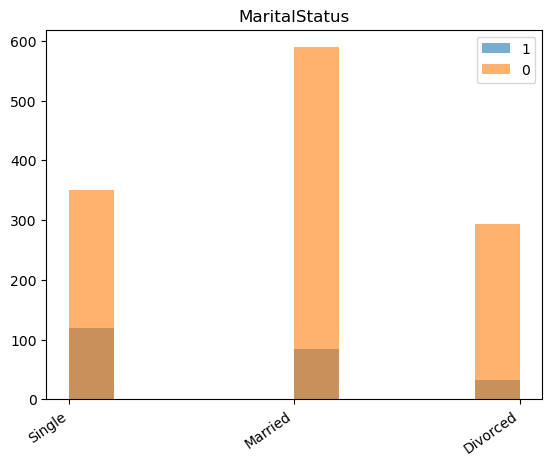

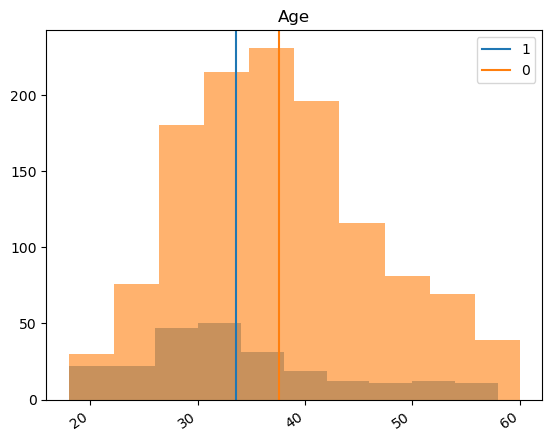

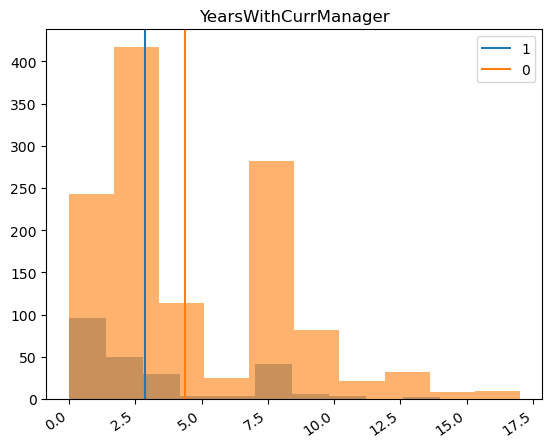

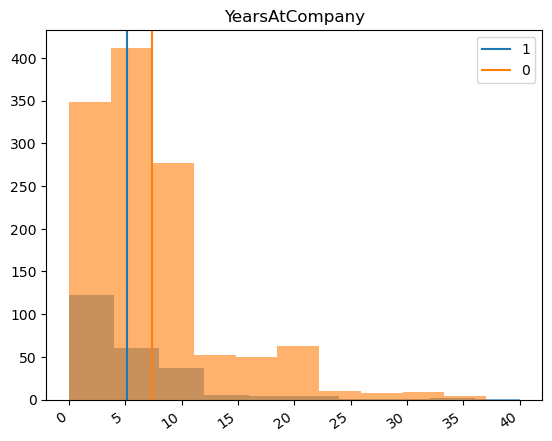

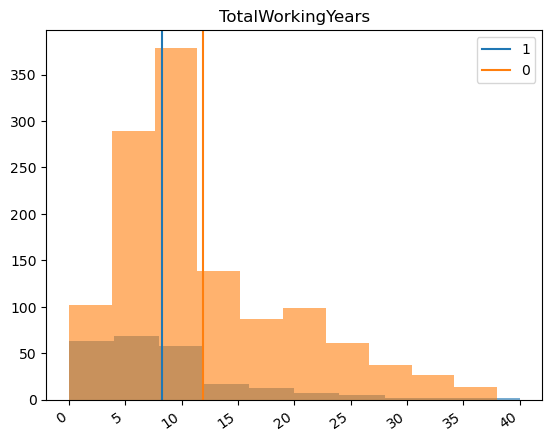

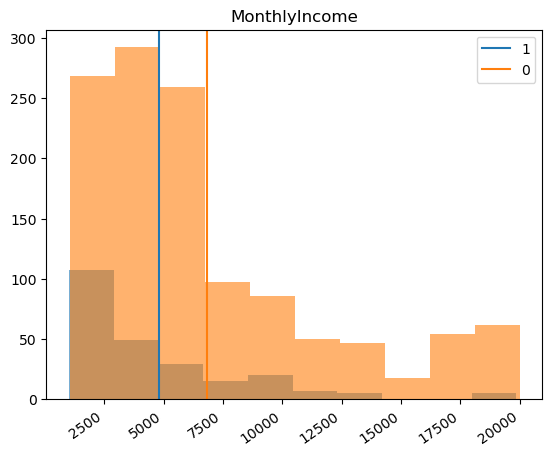

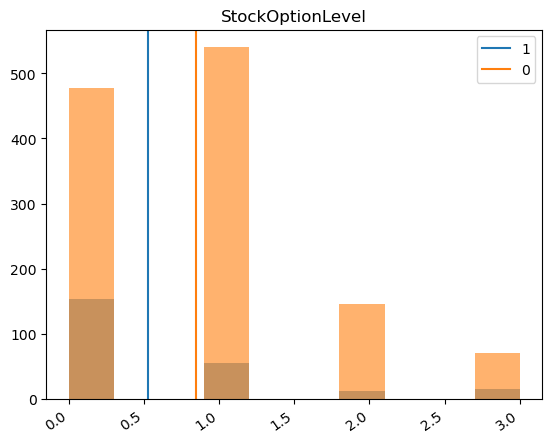

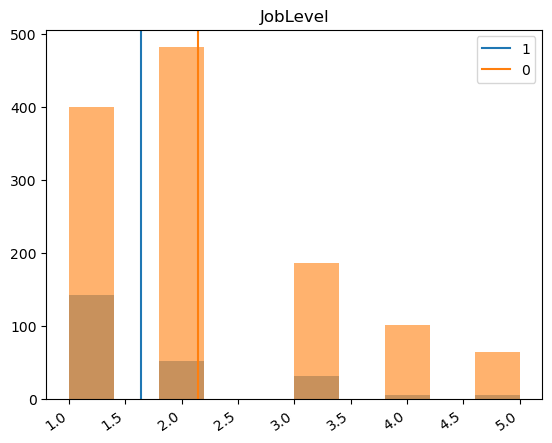

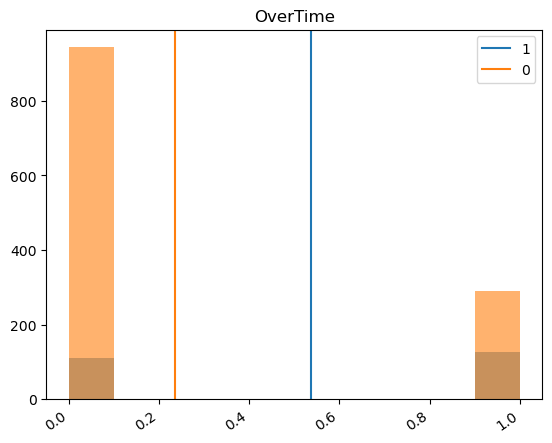

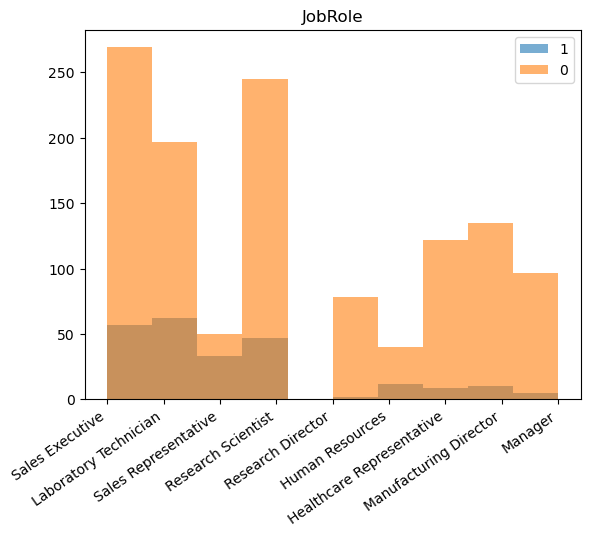

In [22]:
names = ["DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyRate", "NumCompaniesWorked",
         "PercentSalaryHike", "TrainingTimesLastYear", "YearsSinceLastPromotion",
         "PerformanceRating", "Gender", "Education", "High_satisfaction", "Department",
         "WorkLifeBalance", "EducationField", "Low_satisfaction", "BusinessTravel",
         "JobInvolvement", "YearsInCurrentRole", "MaritalStatus", "Age", "YearsWithCurrManager",
         "YearsAtCompany", "TotalWorkingYears", "MonthlyIncome", "StockOptionLevel", "JobLevel",
         "OverTime", "JobRole"]

# We create a dataset containing all the previous variables
explorationDf = pd.concat([Y, HR_data[names]], axis = 1)

# Using a loop we will iterate the names of the classes to be explored, and we will call the function for each name
for feature in names:
    if pd.api.types.is_numeric_dtype(explorationDf[feature]):
        create_histogram(explorationDf, 'Attrition', feature, True)
    else:
        create_histogram(explorationDf, 'Attrition', feature)

Considering that the proportion of values of each class is not equal (are much fewer observations of class 1), we can not observe big diffrences between the distributions of the variables. There are only some subtle differences sometimes, for example:

- In the variable "Low_satisfaction", the mean value is higher for class 1
- In the variable "High_satisfaction" the mean value is lower for class 0
- The "JobInvolvement" mean is lower for class 1
- In the variables "YearsWithCurrentManager", "YearsAtCompany", "TotalWorkingYears", and "YearsInCurrentRole" the mean is lower for class 1
- In "MaritalStatus" for class 0 the most common category is "Married", but for class 1 is "Single"
- The mean of "Age" is lower for class 1
- The "Overtime" mean value is considerably higher for class 1

There are more differences, however, these are some that are easy to observe. Even if the differences are not very accentuated, there is a pattern for class 1, which is people with lower satisfaction and job involvement, the time they have been in their current employment situation is lower, and people who are mostly Single, Younger than the people from the class 0, and who are exposed to OverTime significantly more.

We also need to consider that for the first variables (those with lower importance according to our previous analysis in the previous version of this project), even if the mean ax_vline is not overlapped, are very close (much more closer than the last variables). For this reason, the importance analysis what was done in the previous project seems right.

Now we will make a similar analysis but for the correlations (only for the cuantitative continuous variables).

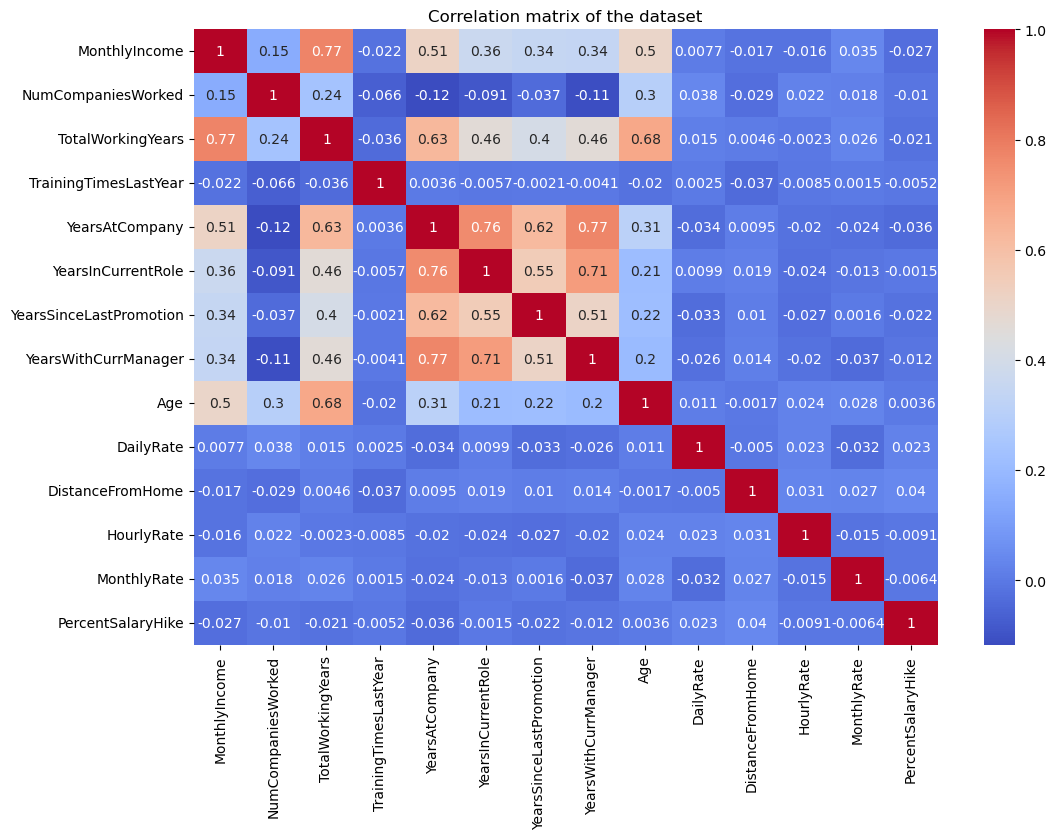

In [23]:
import seaborn as sns
# First we create the correlation matrix without considering the target variable values
correlation_matrix = numeric_variables.corr()
# Now we visualize this matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of the dataset')
plt.show()

Now we will make the same matrix, but considering the class of the variables (for each class we will create a separated matrix).

In [24]:
# We create a dataset containing the cuantitative variables and the target variable
target_cuantitative = pd.concat([Y, numeric_variables], axis = 1)

# We create a separate data frame for each class and we exclude the "Attrition" column (we only used it for filtering the data)
# CLASS 1
only_class1 = target_cuantitative[target_cuantitative['Attrition']==1]
only_class1 = only_class1.drop(columns=['Attrition'])
# Creating correlation matrix
correlation_class1 = only_class1.corr()

# CLASS 0
only_class0 = target_cuantitative[target_cuantitative['Attrition']==0]
only_class0 = only_class0.drop(columns=['Attrition'])
# Creating correlation matrix
correlation_class0 = only_class0.corr()

Now we will visualize these correlation matrixes

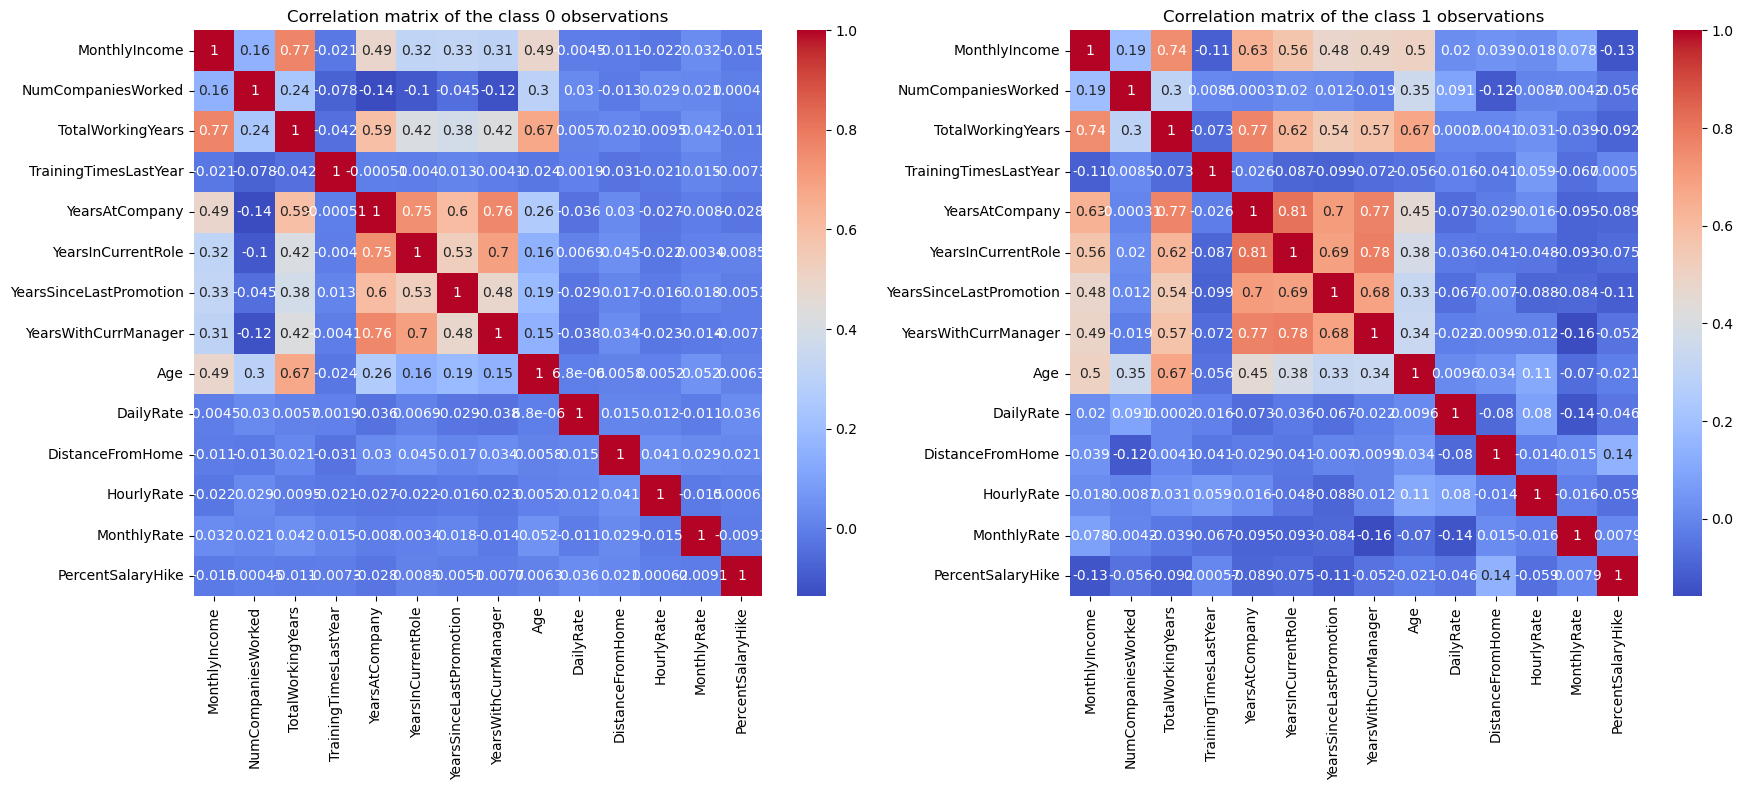

In [25]:
# We create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Correlation matrix for class 0
sns.heatmap(correlation_class0, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation matrix of the class 0 observations')

# Correlation matrix for class 1
sns.heatmap(correlation_class1, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation matrix of the class 1 observations')

# Me show the figure of both correlation matrixes
plt.tight_layout()  # We use "tight_layout" for avoiding overlappings
plt.show()

<div class="alert alert-block alert-success">
<strong>VERDE</strong>

</div>

<div class="alert alert-block alert-info">
<strong>AZUL</strong>

</div>

<div class="alert alert-block alert-danger">
<strong>ROJO</strong>
</div>